In [1]:
# Clustering

# import neccesary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load dataset
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [3]:
# Data Preprocessing
# Handle missing values
df.fillna(df.mean(), inplace=True)

In [4]:
# Remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [5]:
# Scaling features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [6]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,2875.000000,2875.000000,2875.0,2875.000000,2875.0,2875.0,2875.000000,2875.000000,2875.000000,2875.000000,2875.000000,2875.000000
mean,2113.814609,46840.297739,0.0,1.829913,1.0,1.0,10872.930435,9.385739,57.085217,0.198609,3926.959652,0.279652
std,1151.821810,42611.722286,0.0,1.154373,0.0,0.0,13664.119401,7.753492,150.711569,0.484841,2044.017792,0.448906
min,1.000000,50.000000,0.0,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,1131.500000,15275.000000,0.0,1.000000,1.0,1.0,500.000000,2.000000,0.000000,0.000000,2154.500000,0.000000
50%,2167.000000,33327.000000,0.0,1.000000,1.0,1.0,4500.000000,9.000000,0.000000,0.000000,3805.000000,0.000000
75%,3101.500000,65980.500000,0.0,3.000000,1.0,1.0,17089.000000,15.000000,0.000000,0.000000,5566.000000,1.000000
max,4021.000000,202636.000000,0.0,5.000000,1.0,1.0,57382.000000,38.000000,767.000000,2.000000,8296.000000,1.000000


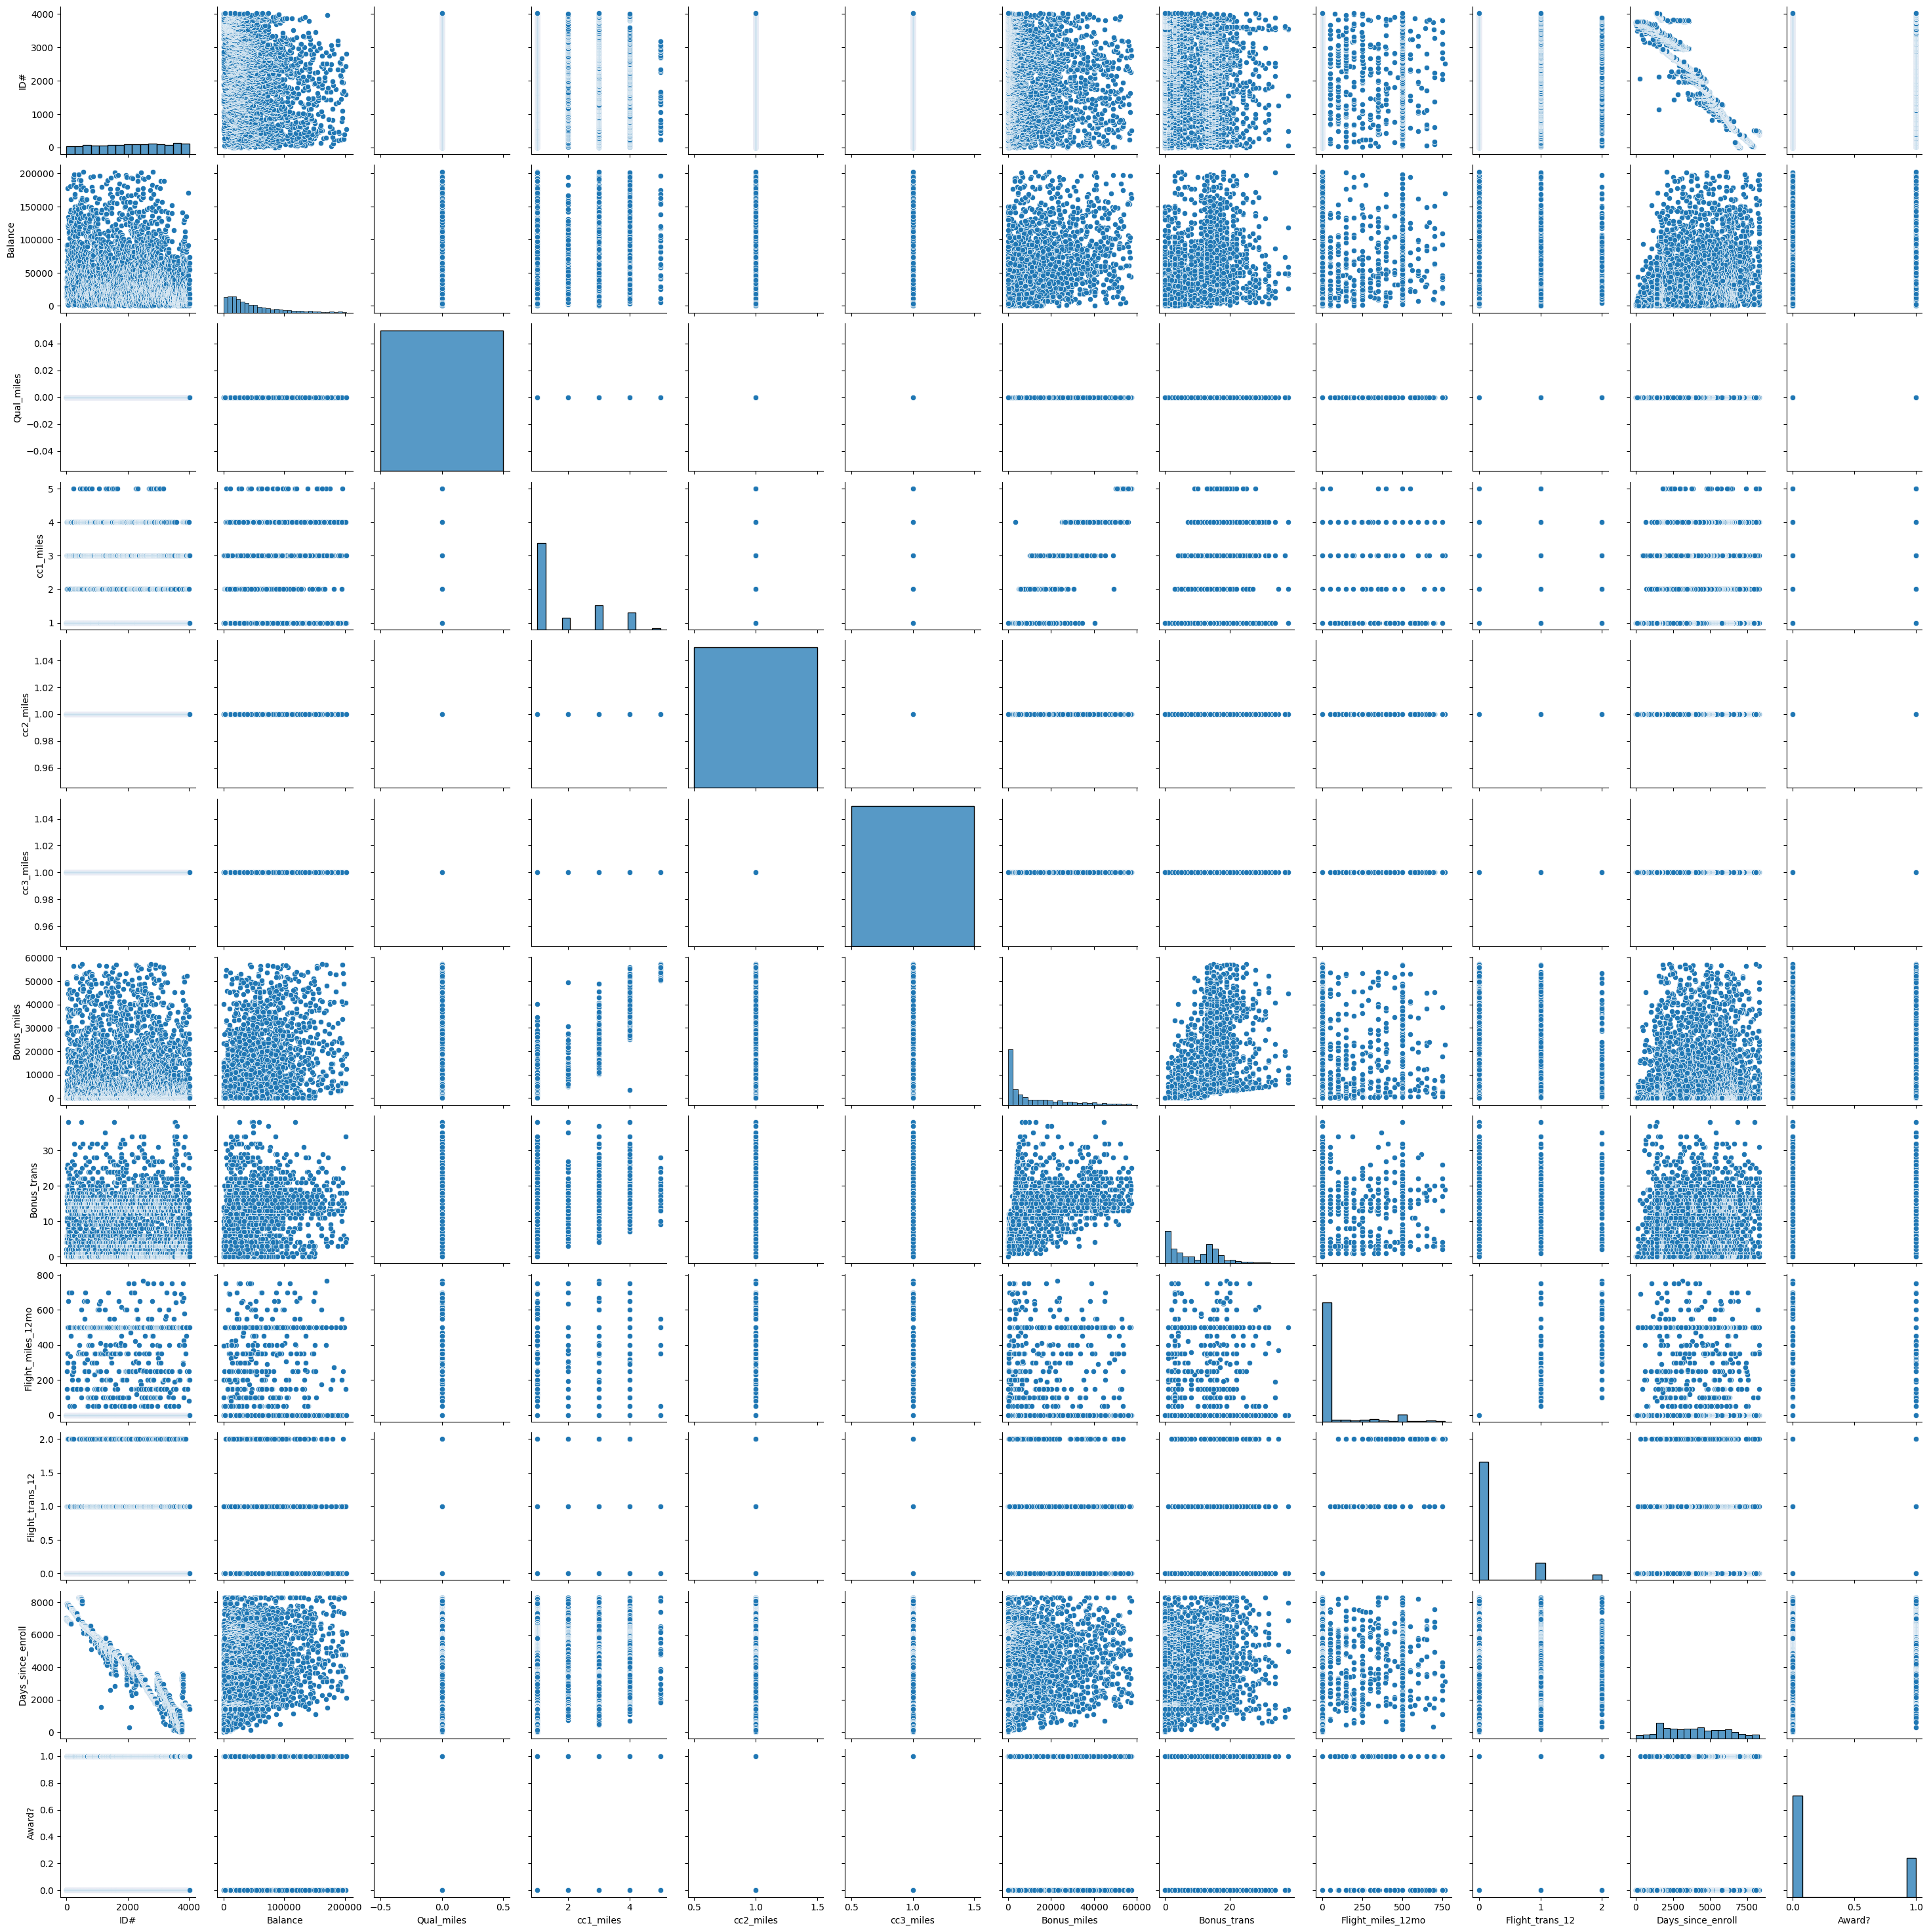

In [7]:
# EDA
sns.pairplot(df)
plt.show()

In [10]:
import warnings
warnings.filterwarnings("ignore")

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

print("K-Means Silhouette Score: ", silhouette_score(scaled_data, kmeans_labels))


K-Means Silhouette Score:  0.30830264215957265


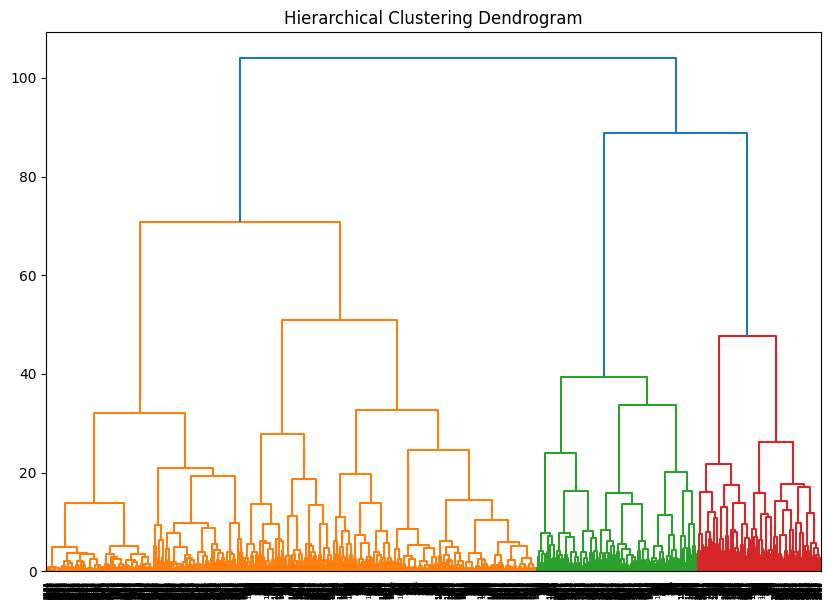

Hierarchical Silhouette Score:  0.27936255076255034


In [12]:
# Hierarchical Clustering
hclust = AgglomerativeClustering(n_clusters=3, linkage='ward')
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(linkage(scaled_data, method='ward'))
plt.show()
labels_hclust = hclust.fit_predict(scaled_data)
print("Hierarchical Silhouette Score: ", silhouette_score(scaled_data, labels_hclust))

In [13]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
print("DBSCAN Silhouette Score: ", silhouette_score(scaled_data, dbscan_labels))

DBSCAN Silhouette Score:  -0.33225832280910966


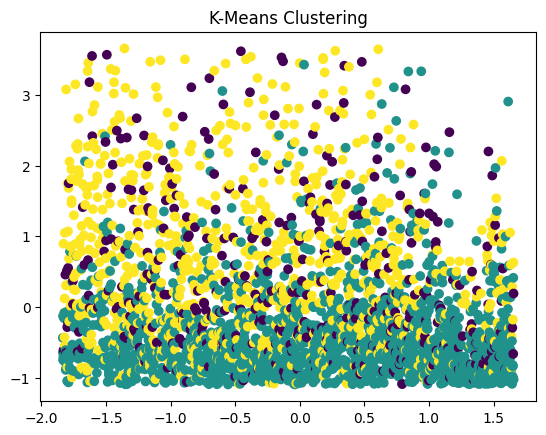

In [14]:
# Visualization
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering')
plt.show()


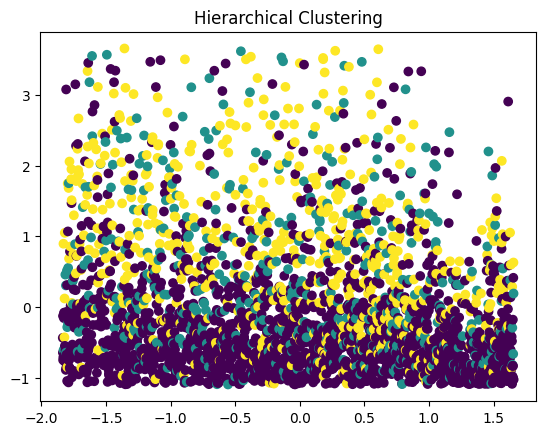

In [15]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels_hclust)
plt.title('Hierarchical Clustering')
plt.show()

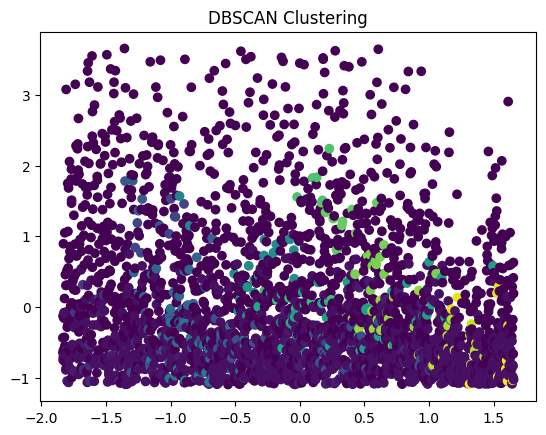

In [16]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()